В данном соревновании вам предстоит решить задачу бинарной классификации. Вам будут даны тренировочная (10000 примеров) и тестовая (2000) выборки. Количество признаков — 30.

Для успешного решения данного задания вам предстоит правильно настроить валидацию, провести отбор признаков и подобрать параметры для итоговой модели.

В результате, необходимо предсказать вероятности положительного класса для данных из тестовой выборки.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import f_classif, mutual_info_classif

In [3]:
import warnings
warnings.filterwarnings("ignore")

### Load data

In [122]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')
train_target = pd.read_csv('input/train-target.csv')

In [123]:
train.shape, test.shape, train_target.shape

((9999, 30), (1999, 30), (9999, 1))

### Data Analize

In [124]:
train = train.drop(train.columns[[17, 22, 7, 9]], axis='columns')

In [125]:
data = train.merge(train_target, how='left', left_index=True, right_index=True)

In [126]:
test = test.drop(test.columns[[17, 22, 7, 9]], axis='columns')

Text(0.5, 0, 'F-value')

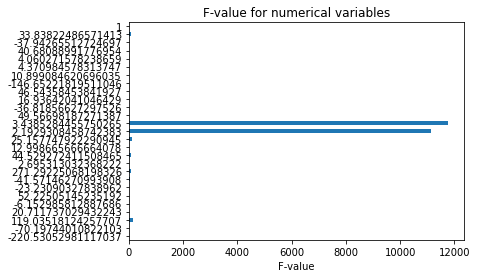

In [9]:
# check importance of numerical variables
imp_num = pd.Series(f_classif(data[data.columns.tolist()],
                              data['1'])[0], index=data.columns.tolist())
imp_num.plot(kind='barh')
plt.title('F-value for numerical variables')
plt.xlabel('F-value')

### Model fitting

In [127]:
y = data['1']         # наш таргет
X = data.drop(['1'], axis=1)

In [114]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.20, shuffle=True, random_state=45)

In [115]:
# проверяем еще раз размер выборок
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7999, 26), (2000, 26), (7999,), (2000,))

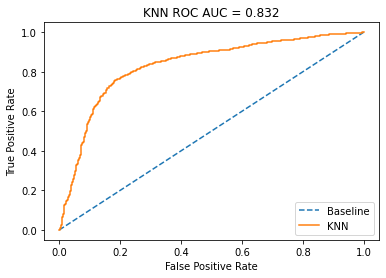

In [20]:
# KNN

# Импортируем необходимые библиотеки:

# from sklearn.neighbors import KNeighborsClassifier

from sklearn.neighbors import KNeighborsRegressor

# model_knn = KNeighborsClassifier(n_neighbors=45, weights='distance', algorithm='auto', n_jobs=-1)
model_knn = KNeighborsRegressor(n_neighbors=47, weights='distance', algorithm='auto', n_jobs=-1) # the best method

model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

fpr, tpr, threshold = sk.metrics.roc_curve(y_test, y_pred_knn)
roc_auc = sk.metrics.roc_auc_score(y_test, y_pred_knn)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'KNN')
plt.title('KNN ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [116]:
y_pred = model_knn.predict(test)

In [117]:
knn_submission = pd.DataFrame(y_pred)
knn_submission.to_csv('input/submission.csv', index=False)